In [ ]:
from google.colab import files
uploaded =files.upload()

Saving features_3_sec.csv to features_3_sec.csv


In [ ]:
#importing required libaries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import sklearn.ensemble as ske

In [ ]:
df2 = pd.read_csv('features_3_sec.csv') #reading the main dataset
df2 #dispalaying the main dataset

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [ ]:
df2.describe() #describing the dataset to get insights of the dataset

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [ ]:
#df = df[~df['label'].isin(['jazz'])]

In [ ]:
#df2 = df[df["label"].str.contains("jazz") == False]
  
#df2.index+=1
#df2

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
1,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
2,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
3,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
4,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
5,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9987,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9988,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9989,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


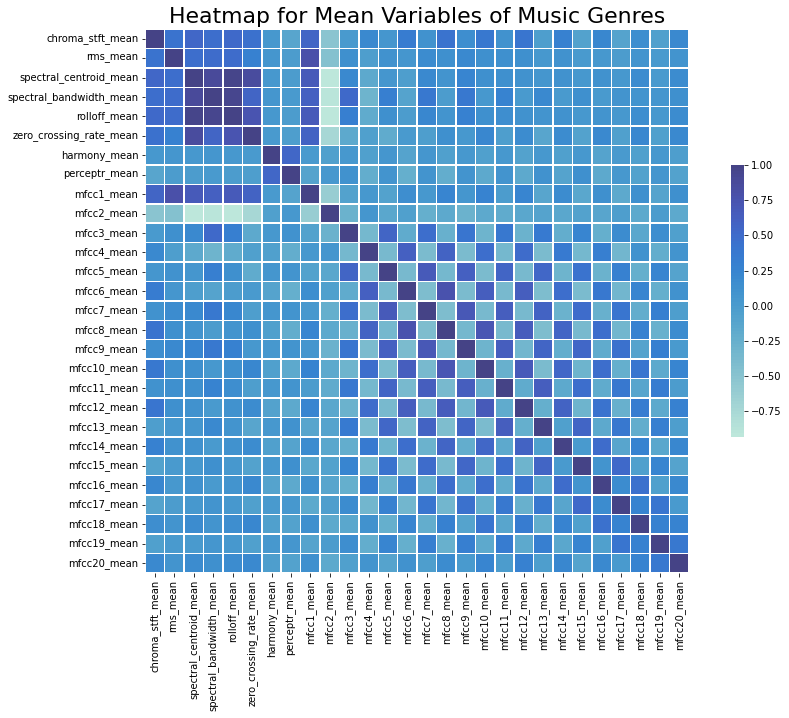

In [ ]:
columns_for_corr = [col for col in df2.columns if 'mean' in col] #assigning the columns
corr = df2[columns_for_corr].corr() #finding the correlation

#the matplotlib figure
plt.figure(figsize=(15,10))
#f, ax = plt.subplots(figsize=(16, 11));
sns.heatmap(corr, center=2, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Heatmap for Mean Variables of Music Genres', fontsize=22)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);


In [ ]:
import librosa
import librosa.display
from IPython.display import Audio

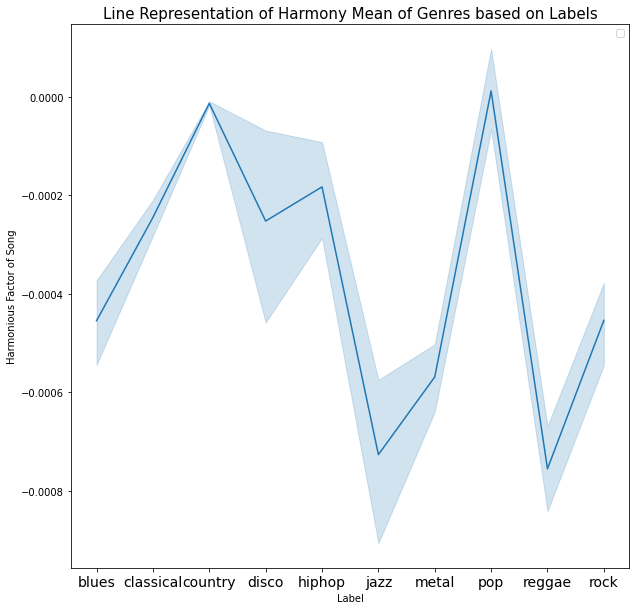

In [ ]:
beats_tempo = df2[["label", "harmony_mean"]]
plt.figure(figsize=(10,10))
sns.lineplot(x = "label", y = "harmony_mean", data = beats_tempo);

plt.title('Line Representation of Harmony Mean of Genres based on Labels', fontsize = 15)
plt.ylabel('Harmonious Factor of Song')
plt.xlabel('Label')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.legend()

In [ ]:
import plotly.express as px
plt.figure(figsize=(15,10))

fig = px.scatter(df2, x='chroma_stft_mean', y='rms_mean', color='label')
fig.update_layout(title='Scatter Plot for Chroma vs RMS',
                  xaxis_title='Chroma Mean',
                  yaxis_title='RMS Mean')


fig.show()


In [ ]:
# fig = px.box(df2, x='label', y='tempo')
# fig.show()

import pandas as pd
import plotly.express as px


# Create the bar chart
fig = px.bar(df2, x='label', y='chroma_stft_mean', color='label')

# Add title and axis labels
fig.update_layout(title='Pitch and Signal structure by Labels',
                  xaxis_title='Label',
                  yaxis_title='Pitch and Signal structure')

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px


# Create the box plot
fig = px.box(df2, x='label', y='tempo', color='label')

# Add title and axis labels
fig.update_layout(title='Boxplot representation for Number of Total Beats/ Minute for Genres',
                  xaxis_title='Genre Type',
                  yaxis_title='Beats Per Minute')

# Show the plot
fig.show()


In [ ]:
fig = px.density_heatmap(df2, x='chroma_stft_mean', y='spectral_bandwidth_mean', z='rms_mean',
                         marginal_x='histogram', marginal_y='histogram',
                         facet_col='label', facet_row='label',
                         nbinsx=20, nbinsy=20)
fig.update_layout(title='Density Heatmap', height=1000)

fig.show()

In [ ]:
import plotly.graph_objects as go



fig = go.Figure()

for genre in df2['label'].unique():
    fig.add_trace(
        go.Scatter(x=df2.loc[df2['label'] == genre, 'rolloff_mean'].index,
                   y=df2.loc[df2['label'] == genre, 'spectral_bandwidth_mean'],
                   mode='lines',
                   name=genre)
    )

fig.update_layout(title='Interactive Sparklines Graph', xaxis_title='Roll-off', yaxis_title='Spectral Bandwidth')

fig.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


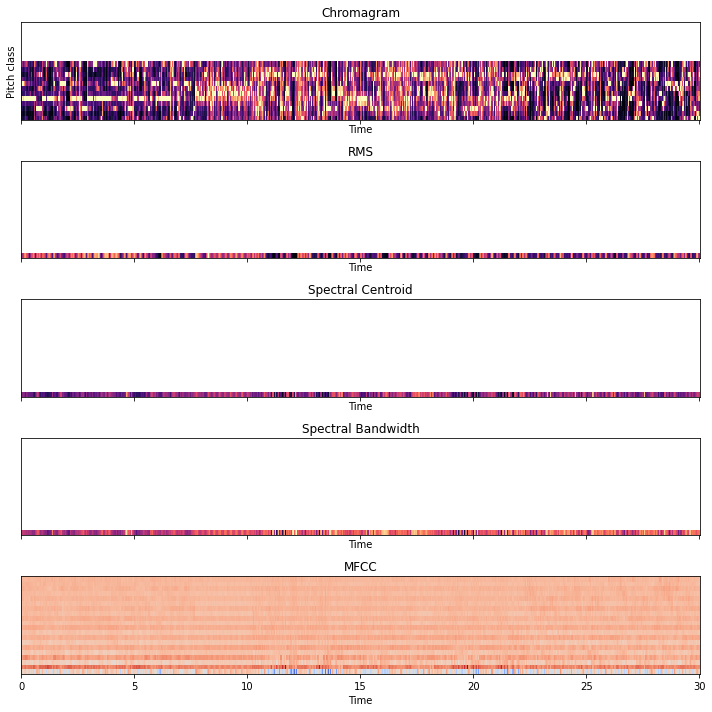

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
filename = '/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/audio_raw_data/hiphop/hiphop.00000.wav'
y, sr = librosa.load(filename)

# Extract features
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
rms = librosa.feature.rms(y=y)
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
mfcc = librosa.feature.mfcc(y=y, sr=sr)

# Plot spectrogram
fig, ax = plt.subplots(nrows=5, sharex=True, sharey=True, figsize=(10,10))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
librosa.display.specshow(rms, x_axis='time', ax=ax[1])
librosa.display.specshow(spectral_centroid, x_axis='time', ax=ax[2])
librosa.display.specshow(spectral_bandwidth, x_axis='time', ax=ax[3])
librosa.display.specshow(mfcc, x_axis='time', ax=ax[4])
ax[0].set(title='Chromagram')
ax[1].set(title='RMS')
ax[2].set(title='Spectral Centroid')
ax[3].set(title='Spectral Bandwidth')
ax[4].set(title='MFCC')
plt.tight_layout()
plt.show()


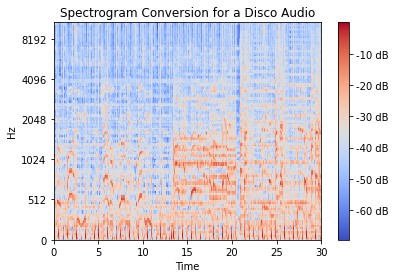

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
filename = '/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/audio_raw_data/disco/disco.00004.wav'
y, sr = librosa.load(filename)

# Compute spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)

# Convert to decibels
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot spectrogram
fig, ax = plt.subplots()
img = librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sr, hop_length=512, cmap='coolwarm')
ax.set(title='Spectrogram Conversion for a Disco Audio')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()


In [ ]:
pip install pydub

In [ ]:
import os
from pydub import AudioSegment

In [ ]:
import os

genres = 'blues classical country disco pop hiphop metal reggae rock'
genres = genres.split()

from pydub import AudioSegment
i = 0
for g in genres:
  j=0
  print(f"{g}")
  for filename in os.listdir(os.path.join(r'/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/audio_raw_data',f"{g}")):

    song  =  os.path.join(r'/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/audio_raw_data/'+f"{g}",f'{filename}')
    j = j+1
    for w in range(0,10):
      i = i+1
      #print(i)
      t1 = 3*(w)*1000
      t2 = 3*(w+1)*1000
      newAudio = AudioSegment.from_wav(song)
      new = newAudio[t1:t2]
      new.export(r'/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/processed_audio_data/'+f"{g}"+'/'+f"{g+str(j)+str(w)}.wav", format="wav")

In [ ]:
import os
#song  =  os.path.join(r'/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/audio_raw_data/'+f"{g}",f'{filename}')
i=0
for w in range(0,10): #for loop to iterate within a range
  i=i+1 #increment for i
  print(i) #display i
  t1 = 3*(w)*1000 #segmenting the audio files
  t2 = 3*(w+1)*1000
  newAudio = AudioSegment.from_wav(r"/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/audio_raw_data/blues/blues.00000.wav") #selecting the audio file from the directory
  new = newAudio[t1:t2]
  new.export(r'/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/For_external/'+f"audio{i}.wav", format="wav") #exporting the audio file

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
from scipy.io import wavfile

In [ ]:


def get_file_paths(dirname): #function for the file names
    file_paths = []   #empty list
    for root, directories, files in os.walk(dirname): 
        for filename in files:   #for loop iteration for files 
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)  
    return file_paths    
DIRNAME = r"/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/processed_audio_data/rock" #use processed data for each category
def main():
    files = get_file_paths(DIRNAME)                 # get file-paths of all the files in the dirname and the subdirectories
    for file in files:                              # execute  each file
        (filepath, ext) = os.path.splitext(file)    # get  file extension
        file_name = os.path.basename(file)          # get basename (writing to the output file)
        if ext == '.wav':                           # only if extension is '.wav'
           rate, data = wavfile.read(filepath+'.wav') # reading wave file.
                     
           plt.figure(figsize=(14, 5))
           fig = plt.hist(data, bins='auto')  # arguments are passed to np.histogram.
           plt.savefig(r'/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/Histogram_Images/rock/'+file_name+'.png') #use inner histogram path for all images
           #plt.close()
if __name__ == '__main__':
    main()




In [ ]:
pip install --force-reinstall numpy==1.23.1 #installing different version of numpy

In [ ]:
!pip install --upgrade librosa #ipgrading librosa

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
from scipy.io import wavfile
import numpy as np

In [ ]:
def get_file_paths(dirname): #setting path for the files
    file_paths = []   #empty list to append
    for root, directories, files in os.walk(dirname): #for loop to iterate audio files
        for filename in files:    #for loop for filenames
            filepath = os.path.join(root, filename) #selecting files
            file_paths.append(filepath)   #appending the data
    return file_paths    
DIRNAME = r"/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/processed_audio_data/rock" #use processed data for each category

def main():
    files = get_file_paths(DIRNAME)                 # get all the file-paths of all the files in the dirname and the subdirectories
    for file in files:                              # execute each file
        (filepath, ext) = os.path.splitext(file)    # get file extension
        file_name = os.path.basename(file)          # get  basename (writing to the) output file
        if ext == '.wav':                           # only interested when extension is '.wav'
           x, sr = librosa.load(filepath+'.wav',sr=None) 
           window_size = 1024
           hop_length = 256
           window = np.hanning(window_size) # window size = 1024; hop_length = 256
           stft= librosa.stft(x, n_fft = window_size, hop_length = hop_length, window = window)
           out = 2 * np.abs(stft) / np.sum(window)
           Xdb = librosa.amplitude_to_db(out, ref = np.max)
           plt.figure(figsize=(14, 5))
           librosa.display.specshow(Xdb, sr=sr)
           
           plt.savefig(r'/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/Spectogram_Images/rock/'+file_name+'.png') #use inner spectogram path
           #plt.close()
if __name__ == '__main__':
    main()
    

In [ ]:
!pip show librosa

In [ ]:
from tensorflow.keras.models import model_from_json
import numpy as np
from keras.preprocessing import image
import tensorflow as tf
from matplotlib import pyplot
from PIL import Image
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [ ]:
from keras.preprocessing import image

In [ ]:
#loading the saved weights of the self designed CNN model which are stored in json files and called using h5 files.

Genere = ["blues", "classical", "country", "disco", "hiphop", "metal", "pop", "reggae", "rock"] #passing labels

with open(r"/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/whole_model_self(specto).json", "r") as json_file: #giving the path directory 
    loaded_model_json = json_file.read() #loading the json file
    loaded_model = model_from_json(loaded_model_json) #loading the model
k='yes' #for iteration
while(k!='No' and k!='no'): #for terminating the process
   # n=input("Enter the [Name] of audio_file:-")
    p=input("Enter the Name of audio file:- ")
    #p=p+"/"+n    
    try:
        loaded_model.load_weights(r"/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/model_weights_self(specto).h5") #passing h5 directory
        loaded_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) #calculation matrix
        
        x, sr = librosa.load(p, sr=None) #using libroisa for loading the weights and for classification
        window_size = 1024 #setting the window size
        hop_length = 256 #setting the hop size
        window = np.hanning(window_size) # window size is = 1024; hop_length is = 256
        stft= librosa.stft(x, n_fft = window_size, hop_length = hop_length, window = window) #passing for the output
        out = 2 * np.abs(stft) / np.sum(window) #calculation based on spectrograms
        Xdb = librosa.amplitude_to_db(out, ref = np.max)   
        
        plt.figure(figsize=(14, 5)) #setting the plot size
        librosa.display.specshow(Xdb, sr=sr)
        plt.savefig(r"/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/Generated_Images_For_Pred/"+n+'.png') #setting a path to save the image
           
        
        # test_image1 = image.load_img(r"/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/Generated_Images_For_Pred/"+n+'.png')
        # test_image3 = np.array(test_image1)
        # img = Image.fromarray(test_image3)
        # img.show()


        test_image = tf.keras.utils.load_img(r"/content/drive/MyDrive/G43- MUSIC_GENRE_CLASSIFICATION_Main/Generated_Images_For_Pred/"+n+'.png', target_size = (288,432)) #loading the image
        test_image = tf.keras.utils.img_to_array(test_image) #converting the image to array for the test cases
        test_image = np.expand_dims(test_image, axis = 0) #dimensions analysis
        test_image/=255.0
        f = loaded_model.predict(test_image) #load prediction model
        print(f) #displaying the results
        f=Genere[np.argmax(f)]
        print("Genre of the audio is = ",f) #displaying yhe genre of the music
    except FileNotFoundError as m: #exceptional handling
            print(m) #displaying the error occured
    
    k=input("Enter No to exit:- ") #for the termination of the process
    
